In [1]:
import cv2
from pycocotools.coco import COCO
import numpy as np
from torchvision import transforms
import matplotlib.pyplot as plt
import json
from PIL import Image, ImageDraw
import torch
import os
import pandas as pd

In [2]:
# COCO 데이터셋 경로
train2017='./train2017/'
train_annotation2017='C:/Users/JOOYONKJ/Desktop/AI/side project/annotations/instances_train2017.json'
val2017='./val2017/'
val_annotation2017='C:/Users/JOOYONKJ/Desktop/AI/side project/annotations/instances_val2017.json'

# COCO 객체 생성
coco_train=COCO(train_annotation2017)
coco_val=COCO(val_annotation2017)

loading annotations into memory...
Done (t=26.70s)
creating index...
index created!
loading annotations into memory...
Done (t=2.16s)
creating index...
index created!


In [3]:
# JSON 파일을 불러옵니다.
with open(train_annotation2017) as t:
    t_data = json.load(t)
    
print(t_data.keys())

dict_keys(['info', 'licenses', 'images', 'annotations', 'categories'])


In [4]:
# 데이터를 각각 추출
t_annotations = t_data['annotations']
t_train_images = t_data['images']
t_categories = t_data['categories']

# pandas 데이터프레임으로 변환
t_annotations_df = pd.DataFrame(t_annotations)
t_images_df = pd.DataFrame(t_train_images)
t_categories_df = pd.DataFrame(t_categories)

In [5]:
# JSON 파일을 불러옵니다.
with open(val_annotation2017) as v:
    v_data = json.load(v)

# 데이터를 각각 추출
v_annotations = v_data['annotations']
v_train_images = v_data['images']
v_categories = v_data['categories']

# pandas 데이터프레임으로 변환
v_annotations_df = pd.DataFrame(v_annotations)
v_images_df = pd.DataFrame(v_train_images)
v_categories_df = pd.DataFrame(v_categories)

In [6]:
t_annotations_df.head(2)

,segmentation,area,iscrowd,image_id,bbox,category_id,id
0,"[[239.97, 260.24, 222.04, 270.49, 199.84, 253....",2765.14865,0,558840,"[199.84, 200.46, 77.71, 70.88]",58,156
1,"[[247.71, 354.7, 253.49, 346.99, 276.63, 337.3...",1545.42130,0,200365,"[234.22, 317.11, 149.39, 38.55]",58,509


In [7]:
v_annotations_df.head(2)

,segmentation,area,iscrowd,image_id,bbox,category_id,id
0,"[[510.66, 423.01, 511.72, 420.03, 510.45, 416....",702.10575,0,289343,"[473.07, 395.93, 38.65, 28.67]",18,1768
1,"[[289.74, 443.39, 302.29, 445.32, 308.09, 427....",27718.47630,0,61471,"[272.1, 200.23, 151.97, 279.77]",18,1773


In [8]:
t_annotations_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 860001 entries, 0 to 860000
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   segmentation  860001 non-null  object 
 1   area          860001 non-null  float64
 2   iscrowd       860001 non-null  int64  
 3   image_id      860001 non-null  int64  
 4   bbox          860001 non-null  object 
 5   category_id   860001 non-null  int64  
 6   id            860001 non-null  int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 45.9+ MB


In [9]:
v_annotations_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36781 entries, 0 to 36780
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   segmentation  36781 non-null  object 
 1   area          36781 non-null  float64
 2   iscrowd       36781 non-null  int64  
 3   image_id      36781 non-null  int64  
 4   bbox          36781 non-null  object 
 5   category_id   36781 non-null  int64  
 6   id            36781 non-null  int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 2.0+ MB


In [10]:
t_images_df.head(2)

,license,file_name,coco_url,height,width,date_captured,flickr_url,id
0,3,000000391895.jpg,http://images.cocodataset.org/train2017/000000...,360,640,2013-11-14 11:18:45,http://farm9.staticflickr.com/8186/8119368305_...,391895
1,4,000000522418.jpg,http://images.cocodataset.org/train2017/000000...,480,640,2013-11-14 11:38:44,http://farm1.staticflickr.com/1/127244861_ab0c...,522418


In [11]:
v_images_df.head(2)

,license,file_name,coco_url,height,width,date_captured,flickr_url,id
0,4,000000397133.jpg,http://images.cocodataset.org/val2017/00000039...,427,640,2013-11-14 17:02:52,http://farm7.staticflickr.com/6116/6255196340_...,397133
1,1,000000037777.jpg,http://images.cocodataset.org/val2017/00000003...,230,352,2013-11-14 20:55:31,http://farm9.staticflickr.com/8429/7839199426_...,37777


In [12]:
t_images_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118287 entries, 0 to 118286
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   license        118287 non-null  int64 
 1   file_name      118287 non-null  object
 2   coco_url       118287 non-null  object
 3   height         118287 non-null  int64 
 4   width          118287 non-null  int64 
 5   date_captured  118287 non-null  object
 6   flickr_url     118287 non-null  object
 7   id             118287 non-null  int64 
dtypes: int64(4), object(4)
memory usage: 7.2+ MB


In [13]:
v_images_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   license        5000 non-null   int64 
 1   file_name      5000 non-null   object
 2   coco_url       5000 non-null   object
 3   height         5000 non-null   int64 
 4   width          5000 non-null   int64 
 5   date_captured  5000 non-null   object
 6   flickr_url     5000 non-null   object
 7   id             5000 non-null   int64 
dtypes: int64(4), object(4)
memory usage: 312.6+ KB


In [14]:
t_categories_df.head(2)

,supercategory,id,name
0,person,1,person
1,vehicle,2,bicycle


In [15]:
v_categories_df.head(2)

,supercategory,id,name
0,person,1,person
1,vehicle,2,bicycle


In [16]:
t_categories_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   supercategory  80 non-null     object
 1   id             80 non-null     int64 
 2   name           80 non-null     object
dtypes: int64(1), object(2)
memory usage: 2.0+ KB


In [17]:
v_categories_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   supercategory  80 non-null     object
 1   id             80 non-null     int64 
 2   name           80 non-null     object
dtypes: int64(1), object(2)
memory usage: 2.0+ KB


In [18]:
#  두 데이터프레임을 'id'와 'image_id' 열을 기준으로 내부 머지
train_df = pd.merge(t_images_df, t_annotations_df, how="inner", left_on='id', right_on='image_id')

# 기존 데이터프레임과 카테고리 데이터프레임을 내부 머지
train_df = pd.merge(train_df, t_categories_df, how="inner", left_on='category_id', right_on='id')

# 불필요한 열을 제거
train_df.drop(["id_x", "id"], axis=1, inplace=True)

# 열 이름을 직관적으로 변경
train_df.rename(columns={
    "id_y": "object_id",
    "name": "category_name"
}, inplace=True)

In [19]:
#  두 데이터프레임을 'id'와 'image_id' 열을 기준으로 내부 머지
val_df = pd.merge(v_images_df, v_annotations_df, how="inner", left_on='id', right_on='image_id')

# 기존 데이터프레임과 카테고리 데이터프레임을 내부 머지
val_df = pd.merge(val_df, v_categories_df, how="inner", left_on='category_id', right_on='id')

# 불필요한 열을 제거
val_df.drop(["id_x", "id"], axis=1, inplace=True)

# 열 이름을 직관적으로 변경
val_df.rename(columns={
    "id_y": "object_id",
    "name": "category_name"
}, inplace=True)

In [20]:
train_df.tail(2)

,license,file_name,coco_url,height,width,date_captured,flickr_url,segmentation,area,iscrowd,image_id,bbox,category_id,object_id,supercategory,category_name
859999,3,000000395293.jpg,http://images.cocodataset.org/train2017/000000...,612,612,2013-11-24 20:31:23,http://farm9.staticflickr.com/8244/8544540366_...,"[[264.7, 422.07, 264.7, 397.35, 272.63, 364.23...",3904.92850,0,395293,"[237.18, 364.23, 64.84, 138.06]",87,1672698,indoor,scissors
860000,3,000000342307.jpg,http://images.cocodataset.org/train2017/000000...,375,500,2013-11-24 20:54:28,http://farm4.staticflickr.com/3076/3160532038_...,"[[245.47, 173.16, 251.6, 166.51, 297.14, 166.0...",26467.97895,0,342307,"[50.55, 99.49, 389.83, 213.34]",87,1157712,indoor,scissors


In [21]:
val_df.tail(2)

,license,file_name,coco_url,height,width,date_captured,flickr_url,segmentation,area,iscrowd,image_id,bbox,category_id,object_id,supercategory,category_name
36779,3,000000501368.jpg,http://images.cocodataset.org/val2017/00000050...,500,375,2013-11-24 13:29:44,http://farm1.staticflickr.com/41/76172159_a3be...,"[[155.44, 37.72, 177.46, 24.76, 190.41, 26.06,...",302.02640,0,501368,"[155.44, 24.76, 34.97, 20.73]",89,2197655,indoor,hair drier
36780,3,000000569976.jpg,http://images.cocodataset.org/val2017/00000056...,640,480,2013-11-24 22:08:49,http://farm5.staticflickr.com/4093/4737241362_...,"[[270.38, 336.54, 281.89, 320.72, 304.9, 340.8...",10347.80605,0,569976,"[194.58, 209.63, 144.71, 229.02]",89,1188281,indoor,hair drier


In [22]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 860001 entries, 0 to 860000
Data columns (total 16 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   license        860001 non-null  int64  
 1   file_name      860001 non-null  object 
 2   coco_url       860001 non-null  object 
 3   height         860001 non-null  int64  
 4   width          860001 non-null  int64  
 5   date_captured  860001 non-null  object 
 6   flickr_url     860001 non-null  object 
 7   segmentation   860001 non-null  object 
 8   area           860001 non-null  float64
 9   iscrowd        860001 non-null  int64  
 10  image_id       860001 non-null  int64  
 11  bbox           860001 non-null  object 
 12  category_id    860001 non-null  int64  
 13  object_id      860001 non-null  int64  
 14  supercategory  860001 non-null  object 
 15  category_name  860001 non-null  object 
dtypes: float64(1), int64(7), object(8)
memory usage: 111.5+ MB


In [23]:
val_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36781 entries, 0 to 36780
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   license        36781 non-null  int64  
 1   file_name      36781 non-null  object 
 2   coco_url       36781 non-null  object 
 3   height         36781 non-null  int64  
 4   width          36781 non-null  int64  
 5   date_captured  36781 non-null  object 
 6   flickr_url     36781 non-null  object 
 7   segmentation   36781 non-null  object 
 8   area           36781 non-null  float64
 9   iscrowd        36781 non-null  int64  
 10  image_id       36781 non-null  int64  
 11  bbox           36781 non-null  object 
 12  category_id    36781 non-null  int64  
 13  object_id      36781 non-null  int64  
 14  supercategory  36781 non-null  object 
 15  category_name  36781 non-null  object 
dtypes: float64(1), int64(7), object(8)
memory usage: 4.8+ MB


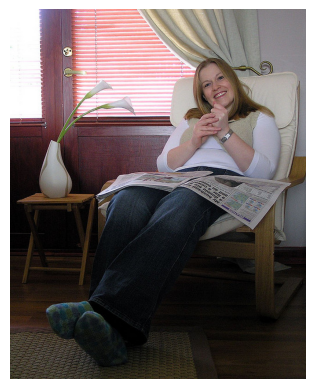

In [48]:
# train_df에서 랜덤하게 하나의 row를 선택
random_row = train_df.sample(n=1).iloc[0]

# 이미지 파일 경로를 구성
img_path = os.path.join(train2017, random_row['file_name'])

# 이미지를 불러옴
image = cv2.imread(img_path)

# OpenCV는 이미지를 BGR 형식으로 불러오므로, plt로 표시하기 전에 RGB 형식으로 변환
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# 이미지를 표시
plt.imshow(image_rgb)
plt.axis('off')  # 축 정보 제거
plt.show()

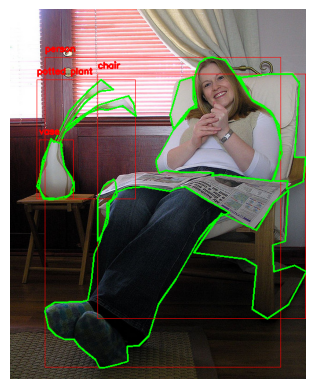

In [49]:
# train_df에서 이미지와 같은 image_id를 가진 모든 어노테이션을 선택
image_annotations = train_df[train_df['image_id'] == random_row['image_id']]

# 이미지에 어노테이션을 시각화
for _, ann in image_annotations.iterrows():
    # 바운딩 박스 그리기
    bbox = np.array(ann['bbox']).astype(int)
    cv2.rectangle(image_rgb, ((bbox[0]), (bbox[1])), 
                  ((bbox[0] + bbox[2]), (bbox[1] + bbox[3])), (255, 0, 0), 1)
    
    # 카테고리 이름 표시
    cat_name = ann['category_name']
    cv2.putText(image_rgb, cat_name, ((bbox[0]), (bbox[1] - 10)), 
                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)
    
    # Segmentation 그리기
    if type(ann['segmentation']) == list:
        for segmentation in ann['segmentation']:
            poly = np.array(segmentation).reshape((-1, 1, 2))
            cv2.polylines(image_rgb, [poly.astype(np.int32)], True, (0, 255, 0), 2)

# 변경된 이미지를 시각화
plt.imshow(image_rgb)
plt.axis('off')
plt.show()

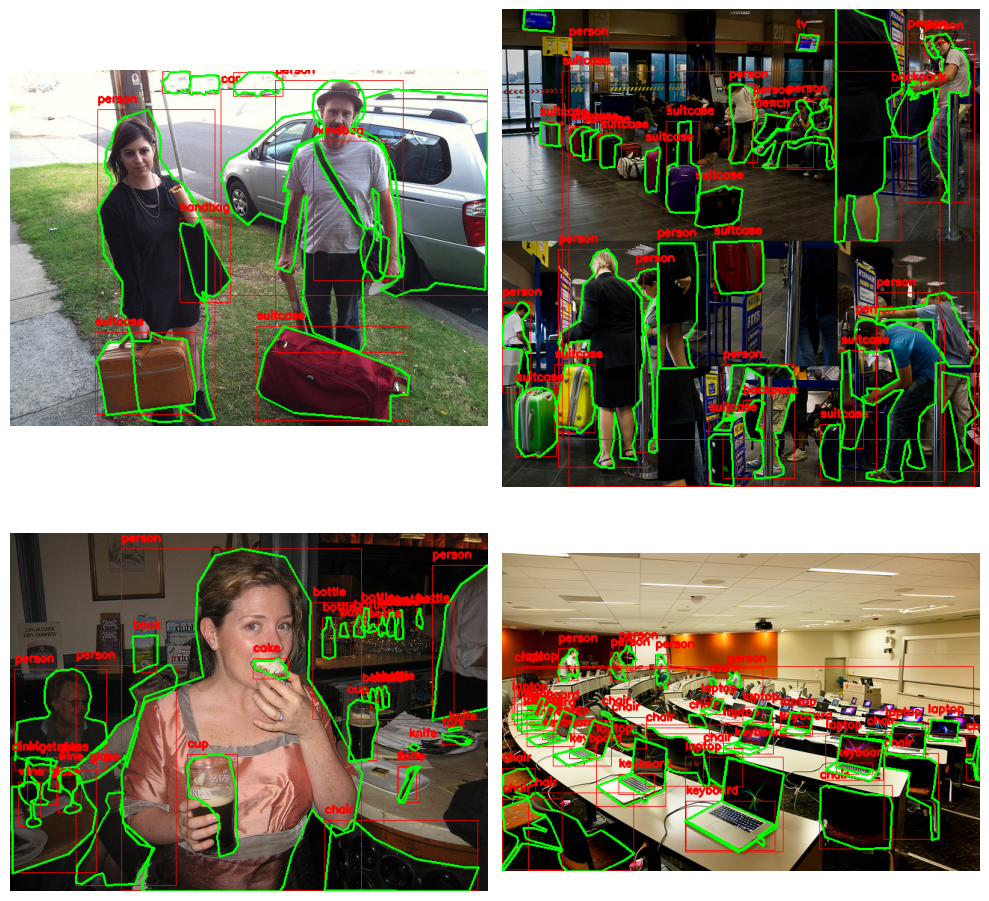

In [52]:
# 랜덤하게 4장의 이미지를 선택
sample_images = train_df.sample(n=4)

# 2x2 서브플롯 생성
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
axs = axs.ravel()

for i, (_, row) in enumerate(sample_images.iterrows()):
    # 이미지 파일 경로
    img_path = os.path.join(train2017, row['file_name'])
    # 이미지를 불러옴
    image = cv2.imread(img_path)
    # OpenCV는 이미지를 BGR 형식으로 불러오므로, plt로 표시하기 전에 RGB 형식으로 변환
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    # 현재 이미지에 대한 어노테이션을 선택
    image_annotations = train_df[train_df['image_id'] == row['image_id']]

    # 이미지에 어노테이션을 시각화
    for _, ann in image_annotations.iterrows():
        # 바운딩 박스 그리기
        bbox = np.array(ann['bbox']).astype(int)
        cv2.rectangle(image_rgb, (bbox[0], bbox[1]), (bbox[0] + bbox[2], bbox[1] + bbox[3]), (255, 0, 0), 1)
        
        # 카테고리 이름 표시
        cat_name = ann['category_name']
        cv2.putText(image_rgb, cat_name, (bbox[0], bbox[1] - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)
        
        # Segmentation 그리기
        if type(ann['segmentation']) == list:
            for segmentation in ann['segmentation']:
                poly = np.array(segmentation).reshape((-1, 1, 2))
                cv2.polylines(image_rgb, [poly.astype(np.int32)], True, (0, 255, 0), 2)

    # 서브플롯에 이미지를 표시
    axs[i].imshow(image_rgb)
    axs[i].axis('off')

plt.tight_layout()
plt.show()


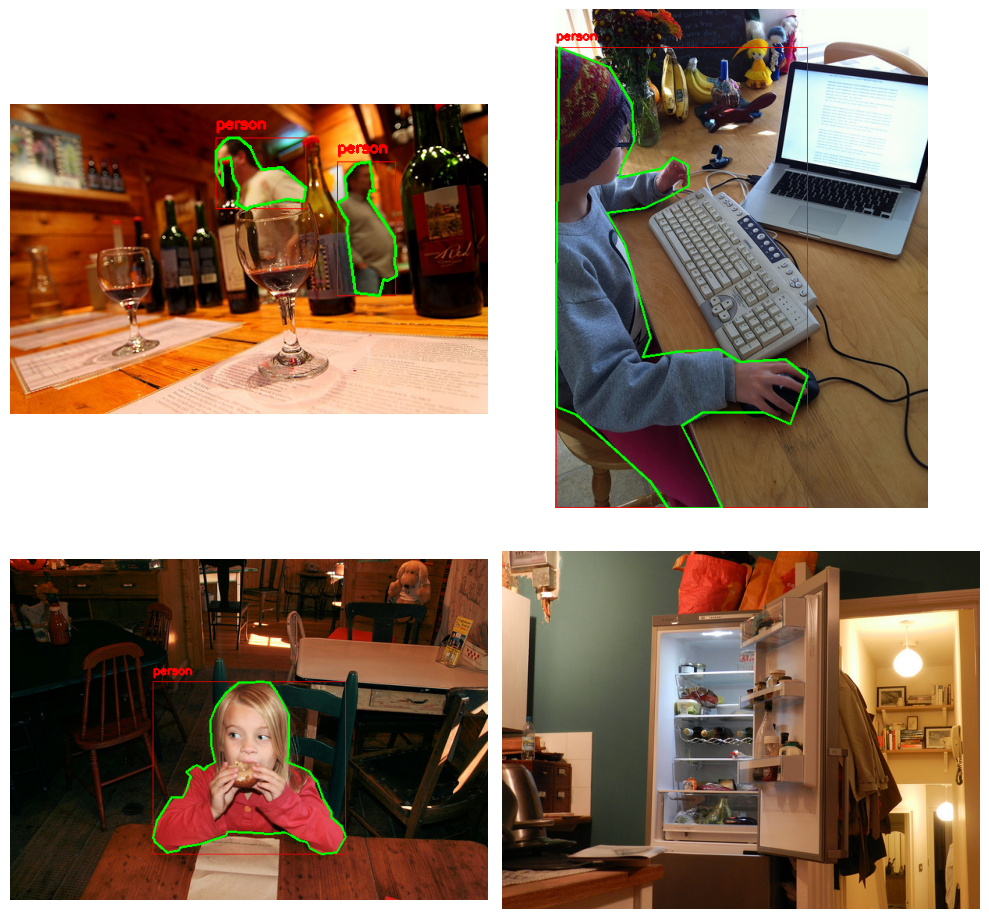

In [54]:
# 'person' 카테고리에 해당하는 category_id 찾기
person_category_id = t_categories_df[t_categories_df['name'] == 'person']['id'].iloc[0]

# 랜덤하게 4장의 이미지를 선택
sample_images = train_df.sample(n=4)

# 2x2 서브플롯 생성
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
axs = axs.ravel()

for i, (_, row) in enumerate(sample_images.iterrows()):
    # 이미지 파일 경로
    img_path = os.path.join(train2017, row['file_name'])
    # 이미지를 불러옴
    image = cv2.imread(img_path)
    # OpenCV는 이미지를 BGR 형식으로 불러오므로, plt로 표시하기 전에 RGB 형식으로 변환
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    # 현재 이미지에 대한 어노테이션을 선택
    image_annotations = train_df[(train_df['image_id'] == row['image_id']) & (train_df['category_id'] == person_category_id)]

    # 이미지에 어노테이션을 시각화
    for _, ann in image_annotations.iterrows():
        # 바운딩 박스 그리기
        bbox = np.array(ann['bbox']).astype(int)
        cv2.rectangle(image_rgb, (bbox[0], bbox[1]), (bbox[0] + bbox[2], bbox[1] + bbox[3]), 
                      (255, 0, 0), 1)
        
        # 카테고리 이름 표시
        cat_name = ann['category_name']
        cv2.putText(image_rgb, cat_name, (bbox[0], bbox[1] - 10), 
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)
        
        # Segmentation 그리기
        if type(ann['segmentation']) == list:
            for segmentation in ann['segmentation']:
                poly = np.array(segmentation).reshape((-1, 1, 2))
                cv2.polylines(image_rgb, [poly.astype(np.int32)], True, (0, 255, 0), 2)

    # 서브플롯에 이미지를 표시
    axs[i].imshow(image_rgb)
    axs[i].axis('off')

plt.tight_layout()
plt.show()